# 대한민국 미추홀구 전월세 실거래가

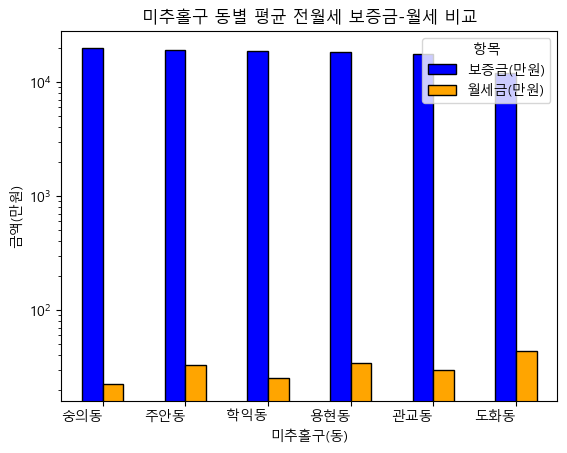

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import re

# 폰트, 크기 설정
rc("font", family='Malgun Gothic')
rc("font", size=10)

# CSV 파일 읽기
df = pd.read_csv('아파트(전월세)_실거래가.csv', encoding='euc-kr')

# 보증금(만원)과 월세금(만원) 컬럼에서 쉼표 제거한 뒤 정수로 변환 평균 계산 위해
# 보증금, 월세금 열을 col에 넣고 df[col]로 접근하여 정규표현식 처리한다.
for col in ['보증금(만원)', '월세금(만원)']:
    df[col] = (
        df[col]
        # 문자열로 변환
        .astype(str)
        # 정규표현식으로 쉼표 제거 후 int로 변환 (apply로 각 데이터에 대해 정규표현식을 적용해 처리한다.)
        # 숫자 사이에 있는 , 제거
        # (?<=\d): 숫자 뒤에 있는 문자 (숫자가 앞에 있어야 함)
        # (?=\d): 숫자 앞에 있는 문자 (숫자가 뒤에 있어야 함)
        # '' 빈 문자열로 치환한다.
        .apply(lambda x: int(re.sub(r'(?<=\d),(?=\d)', '', x)))
    )

# 동 별 분류를 위해 '시군구' 컬럼에서 동 이름만 추출 (ex: "인천광역시 미추홀구 주안동" -> "주안동")
def dong(s):
    # 문자열 끝에 있는 '동'으로 끝($)나는 단어를 찾음
    # \S+: 공백이 아닌 문자 1개 이상 
    m = re.search(r'(\S+동)$', str(s))
    if m:
        return m.group(0)  # 첫 번째 그룹 (ex 주안동) 안의 내용 반환
    else:
        return None

# 각 행의 '시군구' 컬럼에 dong 함수 적용하여 '동' 컬럼 생성 (apply)
df['동'] = df['시군구'].apply(dong)

# 동을 제대로 추출하지 못한 행(None값)은 제외
df = df.dropna(subset=['동'])

# 동별 평균 보증금 및 평균 월세금 계산
# 같은 값을 가진 데이터들을 그룹으로 묶어서 계산하는 기능
# '동'별로 그룹화, 특정 칼럼 보증금, 월세금만 선택
# mean()으로 평균 계산 후 정렬
summary = df.groupby('동')[['보증금(만원)', '월세금(만원)']].mean()
# Pandas에서 계산하는 정렬 방법, 내림차순으로
summary = summary.sort_values(by='보증금(만원)', ascending=False)

# 막대 그래프 그리기 (로그 스케일 적용해 값이 작아도 시야에 보일 수 있게 했다.)
ax = summary.plot(
    # 막대 그래프
    kind='bar',
    # 파랑: 보증금, 주황: 월세
    color=['blue', 'orange'],
    # 막대 테두리 색상
    edgecolor='black',
    # y축을 로그 스케일로 설정 (값 차이가 클 때 사용)
    logy=True
)

# x축
ax.set_xlabel('미추홀구(동)')
# y축
ax.set_ylabel('금액(만원)')
# 제목
ax.set_title('미추홀구 동별 평균 전월세 보증금-월세 비교')

# 가로로 표시
plt.xticks(rotation=0, ha='right')

# 범례 추가
plt.legend(title='항목')

# 그래프 화면에 출력
plt.show()


# 인천광역시 동별 전출입 현황

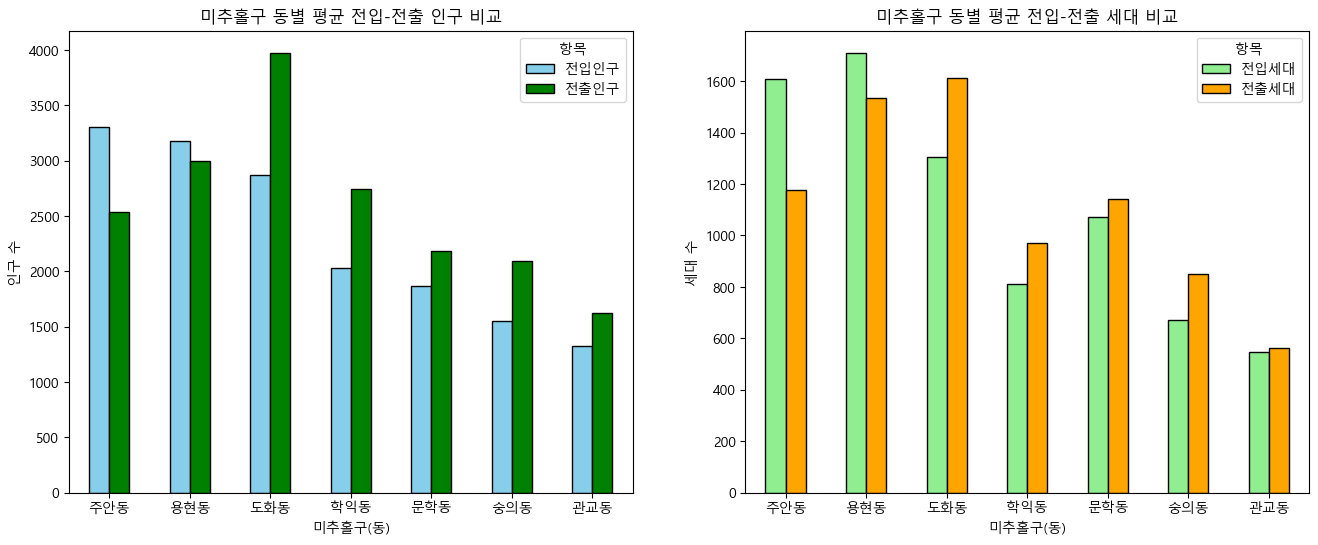

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib import rc

# 폰트 및 크기 설정한다.
rc("font", family='Malgun Gothic')
rc("font", size=10)

# csv 파일 읽기
df = pd.read_csv('인천광역시_미추홀구_동별 전출입_현황.csv', encoding='euc-kr')

# 이름에서 동 이름만 추출하는 함수 정의
def dong(dong_name):
    # 정규표현식으로 동 이름만 추출
    # [\d\.]: 대괄호 안의 문자 중 하나, \d: 숫자, \.: '.'
    # +: 1개 이상의 문자
    # '' 빈 문자열로 치환한다.
    return re.sub(r'[\d\.]+', '', dong_name)

# 각 행의 '행정동' 컬럼에 dong 함수를 적용하여 '동' 컬럼 생성
df['동'] = df['행정동'].apply(dong)

# 동별로 데이터를 그룹화하여 전입인구, 전출인구, 전입세대, 전출세대의 평균값을 계산한다.
grouped = df.groupby('동')[['전입인구', '전출인구', '전입세대', '전출세대']].mean()

# 전입인구를 기준으로 내림차순 정렬 (전입인구가 많은 동부터 순서대로 배치한다.)
grouped = grouped.sort_values(by='전입인구', ascending=False)

# 그래프를 가로로 2개 배치하기 위한 서브플롯 생성한다.
# 그래프 크기를 가로 16, 세로 6으로 설정한다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 왼쪽 차트: 인구 전입-전출을 비교한다.
grouped[['전입인구', '전출인구']].plot(
    # 막대 그래프로 설정한다.
    kind='bar',
    # 첫 번째 서브플롯(왼쪽)에 그린다.
    ax=ax1,
    # 하늘색: 전입인구, 초록색: 전출인구
    color=['skyblue', 'green'],
    # 막대 테두리를 검은색으로 설정한다.
    edgecolor='black'
)

# x축
ax1.set_xlabel('미추홀구(동)')
# y축
ax1.set_ylabel('인구 수')
# 차트 제목
ax1.set_title('미추홀구 동별 평균 전입-전출 인구 비교')
# x축 라벨을 수평으로 맞추기 위해 사용한다.
ax1.tick_params(axis='x', rotation=0)
# 범례 추가 ('전입인구', '전출인구' 구분한다.)
ax1.legend(title='항목')

# 오른쪽 차트: 세대 전입-전출을 비교한다.
grouped[['전입세대', '전출세대']].plot(
    # 막대 그래프로 설정한다.
    kind='bar',
    # 두 번째 서브플롯(오른쪽)에 그린다.
    ax=ax2,
    # 연두색: 전입세대, 주황색: 전출세대
    color=['lightgreen', 'orange'],
    # 막대 테두리를 검은색으로 설정한다.
    edgecolor='black'
)
# x축
ax2.set_xlabel('미추홀구(동)')
# y축
ax2.set_ylabel('세대 수')
# 차트 제목
ax2.set_title('미추홀구 동별 평균 전입-전출 세대 비교')
# x축 라벨을 수평으로 맞추기 위해 사용한다.
ax2.tick_params(axis='x', rotation=0)
# 범례 추가 ('전입세대', '전출세대' 구분한다.)
ax2.legend(title='항목')

plt.show()